# Randomized Trials and Hypothesis Checking 

In [2]:
# -*- coding: utf-8 -*-

import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

#set line width
plt.rcParams['lines.linewidth'] = 4
#set font size for titles 
plt.rcParams['axes.titlesize'] = 16
#set font size for labels on axes
plt.rcParams['axes.labelsize'] = 16
#set size of num_bers on x-axis
plt.rcParams['xtick.labelsize'] = 16
#set size of num_bers on y-axis
plt.rcParams['ytick.labelsize'] = 16
#set size of ticks on x-axis
plt.rcParams['xtick.major.size'] = 7
#set size of ticks on y-axis
plt.rcParams['ytick.major.size'] = 7
#set size of markers, e.g., circles representing points
plt.rcParams['lines.markersize'] = 10
#set num_ber of _times marker is shown when displaying legend
plt.rcParams['legend.numpoints'] = 1
#Set size of type in legend
plt.rcParams['legend.fontsize'] = 14

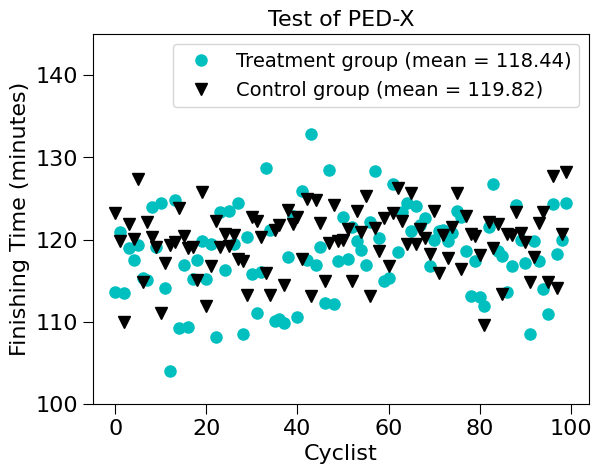

In [3]:
# # Code used to generate data for Figure 21-1 on page 458
random.seed(148)
treatment_dist = (119.5, 5.0)
control_dist = (120, 4.0)
sample_size = 100
treatment_times, control_times = [], []
for s in range(sample_size):
    treatment_times.append(random.gauss(treatment_dist[0],
                                        treatment_dist[1]))
    control_times.append(random.gauss(control_dist[0],
                                      control_dist[1]))
control_mean = sum(control_times)/len(control_times)
treatment_mean = sum(treatment_times)/len(treatment_times)

plt.plot(treatment_times, 'co', markersize = 8,
        label = 'Treatment group (mean = ' +
        str(round(treatment_mean, 2)) + ')')
plt.plot(control_times, 'kv', markersize = 8,
        label = 'Control group (mean = ' +
        str(round(control_mean,2)) + ')')
plt.title('Test of PED-X')
plt.xlabel('Cyclist')
plt.ylabel('Finishing Time (minutes)')
plt.ylim(100, 145)
plt.legend()

Text(0, 0.5, 'Probability')

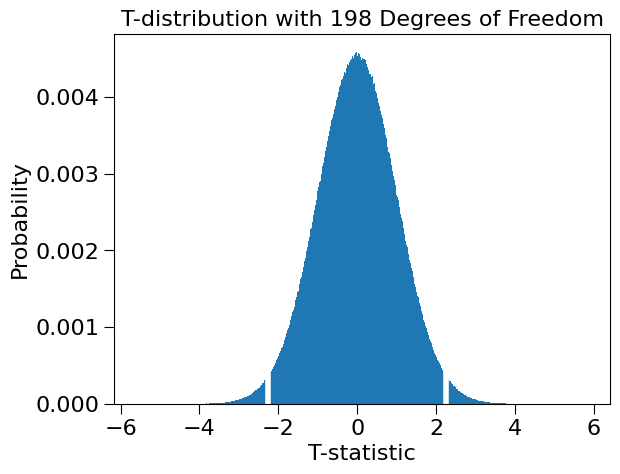

In [5]:
# Code from page 463
t_stat = -2.26 # t-statistic for PED-X example
t_dist = []
num_bins = 1000
for i in range(10000000):
  t_dist.append(np.random.standard_t(198))
plt.hist(t_dist, bins = num_bins,
            weights = np.array(len(t_dist)*[1.0])/len(t_dist))
plt.axvline(t_stat, color = 'w') 
plt.axvline(-t_stat, color = 'w')
plt.title('T-distribution with 198 Degrees of Freedom')
plt.xlabel('T-statistic')
plt.ylabel('Probability')

In [6]:
# Figure 21-5 on page 465
control_mean = round(sum(control_times)/len(control_times), 2)
treatment_mean = round(sum(treatment_times)/len(treatment_times), 2)
print('Treatment mean - control mean =',
      round(treatment_mean - control_mean, 2), 'minutes')
two_sample_test = scipy.stats.ttest_ind(treatment_times,
                                        control_times,
                                        equal_var = False)
print('The t-statistic from two-sample test is',
      round(two_sample_test[0], 2))
print('The p-value from two-sample test is',
      round(two_sample_test[1], 2))

Treatment mean - control mean = -1.38 minutes
The t-statistic from two-sample test is -2.11
The p-value from two-sample test is 0.04


In [7]:
# Figure 21-6 on page 467
random.seed(148)
treatment_dist = (119.5, 5.0)
control_dist = (120, 4.0)
sample_size = 100
treatment_times, control_times = [], []
for s in range(sample_size):
    treatment_times.append(random.gauss(treatment_dist[0],
                                        treatment_dist[1]))
    control_times.append(random.gauss(control_dist[0],
                                      control_dist[1]))

Text(0.5, 0, 'p-value')

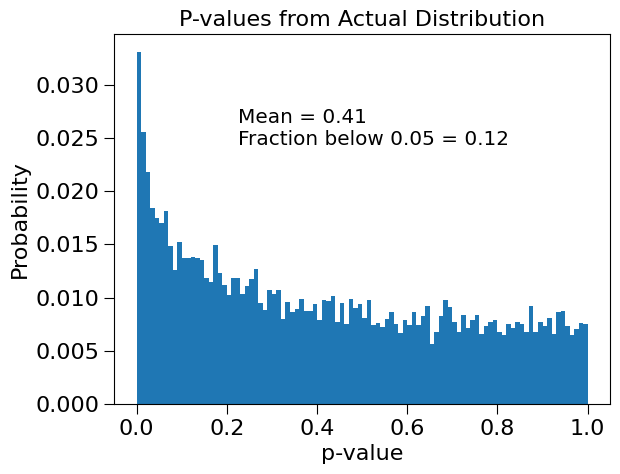

In [8]:
# Code that produced Figure 21-7 on page 468

random.seed(0)

treatment_dist = (119.5, 5.0)
control_dist = (120, 4.0)
sample_size = 100
p_vals = []
for _ in range(10000):
    treatment_times, control_times = [], []
    for s in range(sample_size):
        treatment_times.append(random.gauss(treatment_dist[0],
                                            treatment_dist[1]))
        control_times.append(random.gauss(control_dist[0],
                                          control_dist[1]))
    two_sample_test = scipy.stats.ttest_ind(treatment_times,
                                                control_times,
                                                equal_var = False)
    p_vals.append(two_sample_test[1])
mean = sum(p_vals)/len(p_vals)
num_below = 0
cut_off = 0.05 
for e in p_vals:
    if e <= cut_off:
        num_below += 1
frac_below = round(num_below/len(p_vals), 2)
plt.hist(p_vals, weights = np.array(len(p_vals)*[1])/len(p_vals),
          bins = 100)
plt.annotate('Mean = ' + str(round(mean, 2))
                + '\nFraction below ' + str(cut_off) + ' = ' +
                str(frac_below),
                size = 'x-large',
                xycoords = 'axes fraction', xy = (0.25, 0.7))
plt.title('P-values from Actual Distribution')
plt.ylabel('Probability')
plt.xlabel('p-value')

In [9]:
# Code from Figure 21-5
control_mean = round(sum(control_times)/len(control_times), 2)
treatment_mean = round(sum(treatment_times)/len(treatment_times), 2)
print('Treatment mean - control mean =',
      round(treatment_mean - control_mean, 2), 'minutes')
two_sample_test = scipy.stats.ttest_ind(treatment_times,
                                        control_times,
                                        equal_var = False)
print('The t-statistic from two-sample test is',
      round(two_sample_test[0], 2))
print('The p-value from two-sample test is',
      round(two_sample_test[1], 2))

Treatment mean - control mean = -0.7 minutes
The t-statistic from two-sample test is -1.12
The p-value from two-sample test is 0.27


In [10]:
# Code on page 470 that is to be appended to code from Figure 21-5
one_sample_test = scipy.stats.ttest_1samp(treatment_times, 120)
print('The t-statistic from one-sample test is', one_sample_test[0])
print('The p-value from one-sample test is', one_sample_test[1])

num_games = 1273
lyndsay_wins = 666
outcomes = [1.0]*lyndsay_wins + [0.0]*(num_games - lyndsay_wins)
print('The p-value from a one-sample test is',
      scipy.stats.ttest_1samp(outcomes, 0.5)[1])

The t-statistic from one-sample test is -0.6347328521154282
The p-value from one-sample test is 0.5270668330600234
The p-value from a one-sample test is 0.09822058712435766


In [11]:
# Code from top of page 472
num_games = 1273
lyndsay_wins = 666
outcomes = [1.0]*lyndsay_wins + [0.0]*(num_games - lyndsay_wins)
print('The p-value from a one-sample test is',
      scipy.stats.ttest_1samp(outcomes, 0.5)[1])

The p-value from a one-sample test is 0.09822058712435766


In [12]:
# Code from Figure 21-8 on page 472
num_games = 1273
lyndsay_wins = 666
num_trials = 10000
at_least = 0
for t in range(num_trials):
    l_wins = 0
    for g in range(num_games):
        if random.random() < 0.5:
            l_wins += 1
    if l_wins >= lyndsay_wins:
        at_least += 1
print('Probability of result at least this',
      'extreme by accident =', at_least/num_trials)

Probability of result at least this extreme by accident = 0.0515


In [13]:
# Figure 21-9 on page 473     
num_games = 1273
lyndsay_wins = 666
num_trials = 10000
at_least = 0
for t in range(num_trials):
    l_wins, j_wins = 0, 0
    for g in range(num_games):
        if random.random() < 0.5:
            l_wins += 1
        else:
            j_wins += 1
    if l_wins >= lyndsay_wins or j_wins >= lyndsay_wins:
        at_least += 1
print('Probability of result at least this',
      'extreme by accident =', at_least/num_trials)

Probability of result at least this extreme by accident = 0.1084


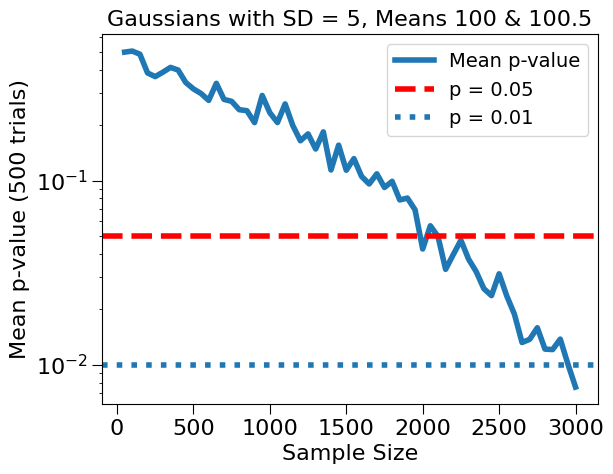

In [14]:
# Code to produce Figure 21-10 on page 475
random.seed(0)
num_trials = 50
gaussian_1, gaussian_2 = [], []
for _ in range(3100):
    gaussian_1.append(random.gauss(100, 5))
    gaussian_2.append(random.gauss(100.5, 5))
p_vals_means = []
for sample_size in range(50, 3040, 50):
    p_vals = []
    for t in range(num_trials):
        sample_1 = random.sample(gaussian_1, sample_size)
        sample_2 = random.sample(gaussian_2, sample_size)
        p_vals.append(scipy.stats.ttest_ind(sample_1, sample_2)[1])
    p_vals_means.append(sum(p_vals)/len(p_vals))
plt.plot(range(50, 3040, 50), p_vals_means, label = 'Mean p-value')
plt.ylabel('Mean p-value (500 trials)')
plt.xlabel('Sample Size')
plt.title('Gaussians with SD = 5, Means 100 & 100.5')
plt.axhline(0.05, color = 'r', linestyle = 'dashed', label = 'p = 0.05')
plt.axhline(0.01, linestyle = ':', label = 'p = 0.01')
plt.yticks(np.arange(0, 1, 0.1))
plt.semilogy()
plt.legend()


In [15]:
# # get_BM_data from Figure 19-2
def get_BM_data(filename):
    """Read the contents of the given file. Assumes the file 
    in a comma-separated format, with 6 elements in each entry:
    0. Name (string), 1. Gender (string), 2. Age (int)
    3. Division (int), 4. Country (string), 5. Overall time (float)   
    Returns: dict containing a list for each of the 6 variables."""

    data = {}
    f = open(filename)
    line = f.readline() 
    data['name'], data['gender'], data['age'] = [], [], []
    data['division'], data['country'], data['time'] = [], [], []
    while line != '':
        split = line.split(',')
        data['name'].append(split[0])
        data['gender'].append(split[1])
        data['age'].append(int(split[2]))
        data['division'].append(int(split[3]))
        data['country'].append(split[4]) 
        data['time'].append(float(split[5][:-1])) #remove \n
        line = f.readline()
    f.close()
    return data

In [17]:
# Figure 2-11 on page 476            
data = get_BM_data('bm_results2012.csv')
countries_to_compare = ['BEL', 'BRA', 'FRA', 'JPN', 'ITA']

# Build mapping from country to list of female finishing _times
country_times = {}
for i in range(len(data['name'])): #for each racer
    if (data['country'][i] in countries_to_compare and
        data['gender'][i] == 'F'):
        try:
            country_times[data['country'][i]].append(data['time'][i])
        except KeyError:
            country_times[data['country'][i]] = [data['time'][i]]

# Compare finishing times of countries
for c1 in countries_to_compare:
    for c2 in countries_to_compare:
        if c1 < c2: # < rather than != so each pair examined once
            pVal = scipy.stats.ttest_ind(country_times[c1],
                                    country_times[c2],
                                    equal_var = False)[1]
            if pVal < 0.05:
                print(c1, 'and', c2,
                      'have significantly different means,',
                      'p-value =', round(pVal, 4))

ITA and JPN have significantly different means, p-value = 0.025


In [18]:
random.seed(0)

# Figure 21-12 on page 478
num_hyps = 50
sample_size = 200
population = []
for i in range(5000): #Create large population
    population.append(random.gauss(0, 1))
sample1s, sample2s = [], []
#Generate many pairs of small sanples
for i in range(num_hyps):
    sample1s.append(random.sample(population, sample_size))
    sample2s.append(random.sample(population, sample_size))
#Check pairs for statistically significant difference
numSig = 0
for i in range(num_hyps):
    if scipy.stats.ttest_ind(sample1s[i], sample2s[i])[1] < 0.05:
        numSig += 1
print('# of statistically significantly different (p < 0.05) pairs  =',
        numSig)
    


# of statistically significantly different (p < 0.05) pairs  = 2
